In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#showing the first 5 row of data
df = pd.read_csv('/Users/da_learner_mac_45/Downloads/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [24]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [25]:
#data dimension
df.shape

(2000, 8)

In [26]:
#checking the sum of null values
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [27]:
#checking for duplicates
df.duplicated().sum()


0

In [28]:
#Changing numerical values to categorical values
df['Sex'].replace({0:'Female',1:'Male'},inplace=True)
df['Education'].replace({0:'other / unknown',1:'high school',2:'university',3:'graduate school'},inplace=True)
df['Occupation'].replace({0:'unemployed / unskilled',1:'skilled employee / official',2:'management / self-employed / highly qualified employee / officer'},inplace=True)
df['Settlement size'].replace({0:'small city',1:'mid-sized city',2:'big city'},inplace=True)
df['Marital status'].replace({0:'single',1:'married'},inplace=True) 

df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,Female,single,67,university,124670,skilled employee / official,big city
1,100000002,Male,married,22,high school,150773,skilled employee / official,big city
2,100000003,Female,single,49,high school,89210,unemployed / unskilled,small city
3,100000004,Female,single,45,high school,171565,skilled employee / official,mid-sized city
4,100000005,Female,single,53,high school,149031,skilled employee / official,mid-sized city


In [29]:
#description of the dataset
df.describe()

,ID,Age,Income
count,2.000000e+03,2000.000000,2000.000000
mean,1.000010e+08,35.909000,120954.419000
std,5.774946e+02,11.719402,38108.824679
min,1.000000e+08,18.000000,35832.000000
25%,1.000005e+08,27.000000,97663.250000
50%,1.000010e+08,33.000000,115548.500000
75%,1.000015e+08,42.000000,138072.250000
max,1.000020e+08,76.000000,309364.000000


In [30]:
df.dtypes

ID                  int64
Sex                object
Marital status     object
Age                 int64
Education          object
Income              int64
Occupation         object
Settlement size    object
dtype: object

In [31]:
#print unique values
print(df['Occupation'].unique())
print(df['Education'].unique())
print(df['Settlement size'].unique())

['skilled employee / official' 'unemployed / unskilled'
 'management / self-employed / highly qualified employee / officer']
['university' 'high school' 'other / unknown' 'graduate school']
['big city' 'small city' 'mid-sized city']


In [32]:
#initializing all the values to 'elderly'
df['Age_Category'] = 'elderly'

# Update the values in the "Age_Category" column based on the age of each person
df.loc[df['Age'] < 35, 'Age_Category'] = 'youth'
df.loc[(df['Age'] > 35) & (df['Age'] < 55), 'Age_Category'] = 'adult'
df.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Age_Category
0,100000001,Female,single,67,university,124670,skilled employee / official,big city,elderly
1,100000002,Male,married,22,high school,150773,skilled employee / official,big city,youth
2,100000003,Female,single,49,high school,89210,unemployed / unskilled,small city,adult
3,100000004,Female,single,45,high school,171565,skilled employee / official,mid-sized city,adult
4,100000005,Female,single,53,high school,149031,skilled employee / official,mid-sized city,adult


In [33]:
#count of distinct Age category
counts = df['Age_Category'].value_counts()
print(counts)

youth      1078
adult       666
elderly     256
Name: Age_Category, dtype: int64


<AxesSubplot:>

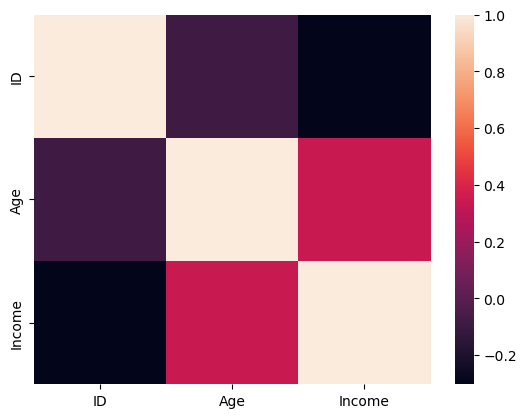

In [34]:
#heat map
sns.heatmap(df.corr())


/Users/da_learner_mac_45/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


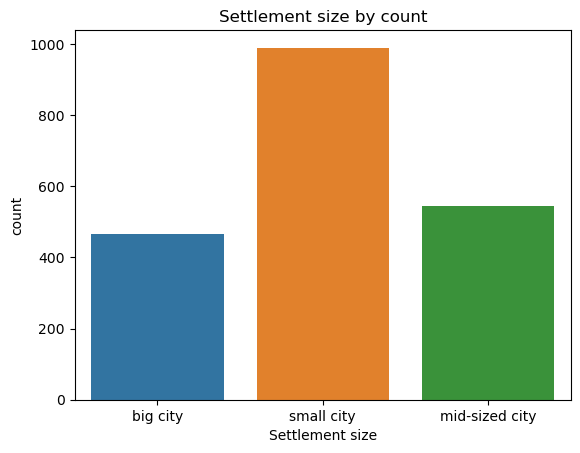

In [35]:
#plot bar graph
sns.countplot(df['Settlement size'])
plt.title('Settlement size by count')

plt.show()

/Users/da_learner_mac_45/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


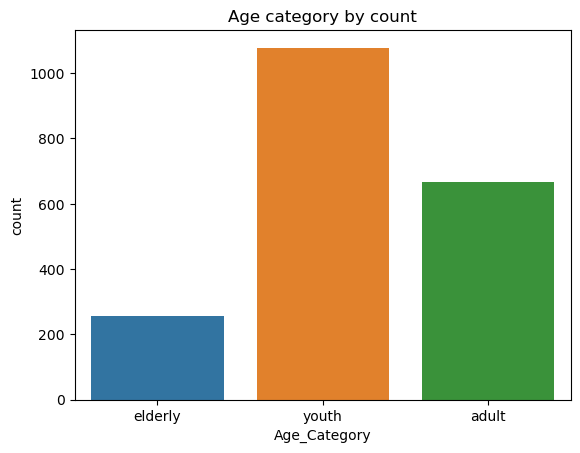

In [36]:
#plot bar graph
sns.countplot(df['Age_Category'])
plt.title('Age category by count')

plt.show()

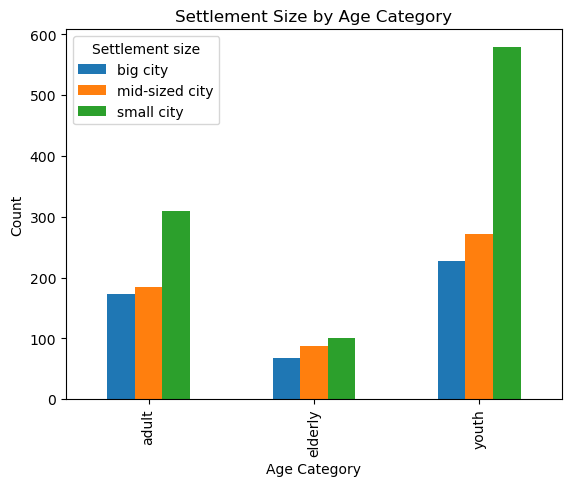

In [37]:
# Create a pivot table that shows the count of each unique combination of Age_Category and Settlement_size
pivot_table = pd.pivot_table(df, values='ID', index='Age_Category', columns='Settlement size', aggfunc='count')

# Plot the results as a bar chart
pivot_table.plot(kind='bar')

# Add labels and title to the chart
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Settlement Size by Age Category')
plt.xticks(rotation=90)
# Show the chart
plt.show()

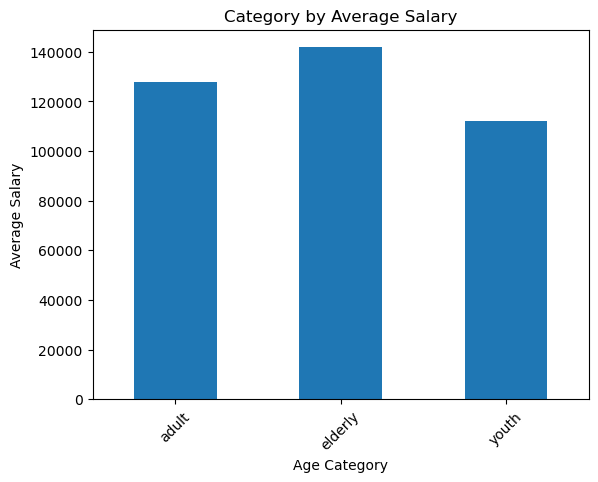

In [38]:
# Plot the results as a bar chart
Income = df.groupby('Age_Category')['Income'].mean()
Income.plot(kind='bar')

# Add labels and title to the chart
plt.xlabel('Age Category')
plt.ylabel('Average Salary')
plt.title('Category by Average Salary')
plt.xticks(rotation=45)

# Show the chart
plt.show()

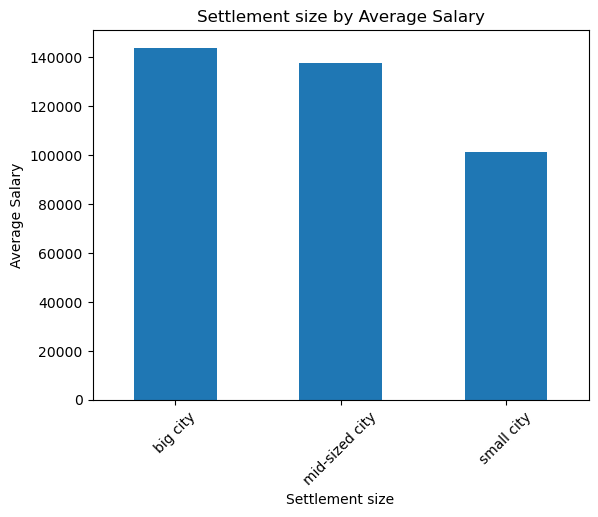

In [39]:
# Plot the results as a bar chart
Income = df.groupby('Settlement size')['Income'].mean()
Income.plot(kind='bar')

# Add labels and title to the chart
plt.xlabel('Settlement size')
plt.ylabel('Average Salary')
plt.title('Settlement size by Average Salary')
plt.xticks(rotation=45)

# Show the chart
plt.show()

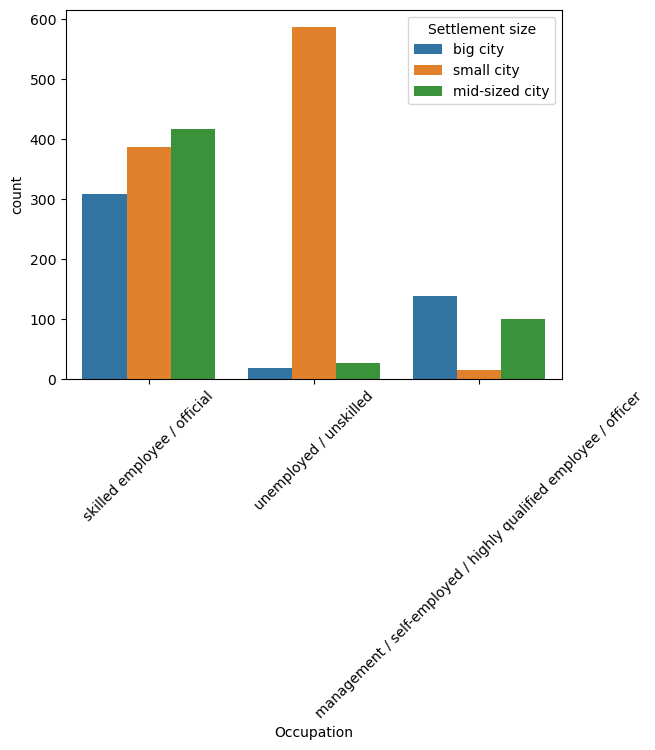

In [40]:
sns.countplot(x='Occupation', hue='Settlement size', data=df)
plt.xticks(rotation=45)
plt.show()

/Users/da_learner_mac_45/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


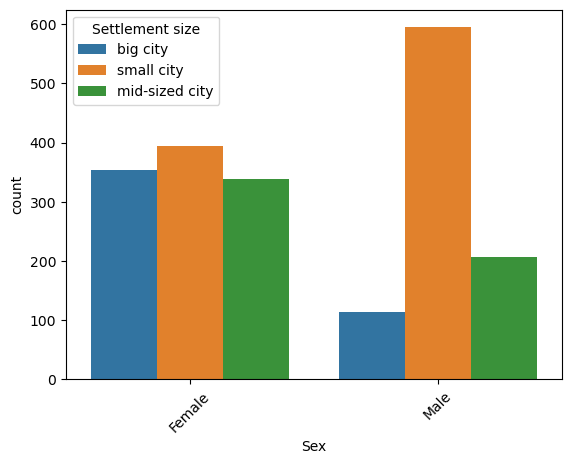

In [41]:
sns.countplot(df['Sex'],hue='Settlement size', data=df)
plt.xticks(rotation=45)
plt.show()

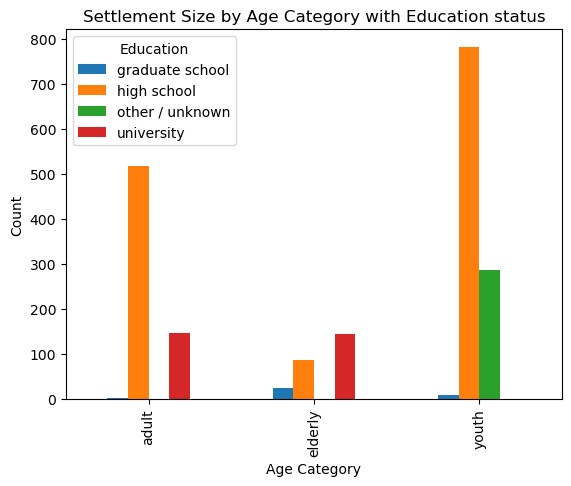

In [42]:
# Create a pivot table that shows the count of each unique combination of Age_Category and Settlement_size
pivot_table = pd.pivot_table(df, values='ID', index='Age_Category', columns='Education', aggfunc='count')

# Plot the results as a bar chart
pivot_table.plot(kind='bar')

# Add labels and title to the chart
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Settlement Size by Age Category with Education status')
plt.xticks(rotation=90)
# Show the chart
plt.show()

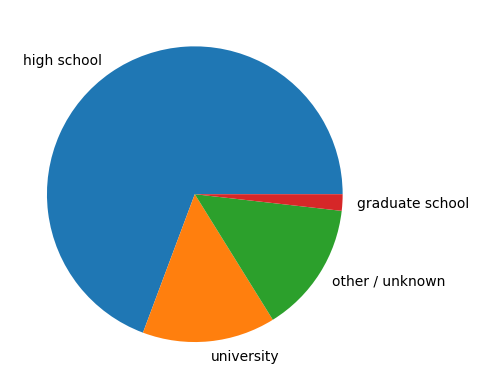

In [43]:
my_column = df['Education']

# Get the value counts for the column
counts = my_column.value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index)

# Show the plot
plt.show()